# Linear regression
* The first machine learning algorithm we will explore is also one of the oldest!
* Linear Regression
    * Theory of Linear Regression
    * Simple Implementation with Python
    * Scikit-Learn Overview
    * Linear Regression with Scikit-learn
    * Polynomial Regression
    * Regularization
    * Overview of Project Dataset
* Unlike future Algorithm sections, the exercise project for linear regression will be spread over many sections, since we will first discuss feature engineering and cross-validation before tackling the full project exercise
## Introduction to linear regression
### Algorithm theory - part one - History and motivation
* This will include the understanding:
    * Brief history
    * Linear relationships
    * Ordinary least squares
    * Cost functions
    * Gradient descent
    * vectorization
#### Linear relationship
* A linear relationship implies some constant straight line relationship
* The simplest possible being y=x
* When x = [1,2,3] and y = [1,2,3]
* We could then (based on the three real data points) build out the relationship y=x as our "fitted" line
* This implies for some new x value I can predict its related y
* But what happens with real data? Where do we draw this line, especially in the case of scatterplot
* Fundamentally, we understand we want to minimize the overall distance from the points to the line.
* We also know we can measure this error from the real data points to the line known as the **residual error**
* Some lines will clearly be better fits than others
* The **residual error** will be both *negative* or *positive*
#### Ordinary least squares
* OLS works by minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given data set and those predicted by the linear function
* We can visualize squared error to minimize
* We need to minimize the square error
* Having a squared error will help us simplify our calculations later on when setting up a derivative
* Let's continue exploring OLS by converting a real data set into mathematical notation, then working to solve a linear relationship between features and a variable

### Algorithm theory - part two - OLS Equations
* Linear Regression OLS theory
    * We know the equation of a simple straight line:
        * y= mx+b
            * m is slope
            * b is intercept with y-axis
    * We can see for **y=mx+b** there is only room for one possible feature x
    * OLS will allow us to directly solve for the slope <b>m</b>, and intercept **b**
    * We will later see we'll need tools like gradient descent to scale this to multiple features
    * Let's explore how we could translate a real data set into mathematical notation for linear regression
    * Then we'll solve a simple case of one feature to explore OLS in action
    * Afterwards we'll focus on gradient descent for real world data set situations
* Linear Regression allows us to build a relationship between **multiple features** to estimate a **target output**
* We can translate this data into generalized mathematical notation
* Columns will represent the features (X), except the label columns which represent for target output (y)
* Each title column will be the feature (x1, x2, x3) which are displayed as superscript
* Each point of column will be the data point or instance ($x_1^1$, $x_2^1$, etc.)
* Similar to the target out put
* The concentration of this belong to the building of linear relationship between the features X and label y
* Reformat for y = x equation
* Each feature should have some Beta coefficient associated with it
* $\hat{y} = \beta_0x_0 + ... + \beta_nx_n $
* This is the same as the common notation for a simple line: *y=mx+b*
* This is stating there is some Beta coefficient for each feature to minimize the error
* We can also express this equation as a sum:
* $\hat{y} = \sum_{i=0}^n \beta_ix_i$
* Note the y hat symbol displays a prediction. There is usually no set of Betas to create a perfect fit to y! - the y hat is just an estimation
* The y hat is the best estimation fit for the data
* Line equation: $\hat{y} = \sum_{i=0}^n \beta_ix_i$
* When you have a single x related to y then there is going to be some beta coefficient that can multiply it by to get some sort of fit that is going to reduce the possible error
* For simple problems with one X feature we can easily solve for Betas values with an analytical solution
* Let's quickly solve a simple example problem, then later we will see that for multiple features we will need gradient descent
* Recall that the equation of a line follows the form $y=mx+b$ where
    * **m** is the **slope** of the line, and
    * <b>b</b> is where the line crosses the y-axis when x=0 (b is the **y-intercept**)
    * when m > 0 (positive slope)
    * when m < 0 (negative slope)
    * when m = 0 (zero slope)
* In a linear regression, where we try to formulate the relationship between variables, $y=\beta_0 + \beta_1x$


### Algorithm Theory - part three - cost function
* Linear Regression OLS theory
    * We know the equation of a simple straight line:
        * y= mx+b
* OLS
    * Solve simple linear regression
* The limitation of OLS:
    * Not scalable for multiple features
* Translating real data to Maxtrix Notation
* Generalized formula for Beta coefficients
* Recall we are searching for Beta values for a best-fit line
    * $\hat{y} = \sum_{i=0}^n \beta_ix_i$
* The equation above simply defines our line, but how to choose beta coeffcients?
* We have decided to define a "best-fit" as **minimizing the squared error**
* The **residual error** for some row *j* is : $y^j - \hat{y}^j$
* **Squared error** for some row *j* is then:
    * $(y^j - \hat{y}^j)^2$
* Sum of squared errors for *m* rows then:
    * $\sum_{j=1}^m(y^j - \hat{y}^j)^2$
* Average squared error for *m* rows is then:
    * $\frac{1}{m}\sum_{j=1}^m(y^j - \hat{y}^j)^2$
* Exactly what we need for a **cost function**

* Develop from the cost function side
* Begin by defining a cost function **J**
* A **cost function** is defined by some measure of error
* This means we wish to **minimize** the cost function
* Our cost function can be defined by the squared error
    * $J(\beta) = \frac{1}{2m}\sum_{j=1}^m(y^j - \hat{y}^j)^2$
    * Note the lowercase **j** is the specific data row
    * Want to minimize cost for set of Betas
    * The error between real y and prediction y hat
    * Squaring corrects for negative and positive errors'
    * Summing error for m rows
    * Divide by **m** to get **mean**
    * The additional 1/2 is for convenience for derivative
    * What is $\hat{y}$? - It will be a function of **Betas** and **Features**
    * $J(\beta) = \frac{1}{2m}\sum_{j=1}^m(y^j - \hat{y}^j)^2 =  \frac{1}{2m}\sum_{j=1}^m(y^j - \sum_{i=0}^n \beta_ix_i^j)^2$
    * Recall from calculus to minimize a function we can take its derivative and set it equal to zero
        * $\frac{\partial J}{\partial\beta_k}(\beta) = \frac{\partial J}{\partial\beta_k}(\frac{1}{2m}\sum_{j=1}^m(y^j - \sum_{i=0}^n \beta_ix_i^j)^2) = \frac{1}{m}\sum_{j=1}^m(y^j - \sum_{i=0}^n \beta_ix_i^j)(-x_k^j)$
    * Unfortunately it is not scalabe to try to get an analytical solution to minimize this cost_function.
    * In next lecture we will learn to use **gradient descent** to minimize this **cost function**

### Algorithm theory - Part four - gradient descent
* We just figured out a **cost function** to minimize!
* Taking the cost function derivative and then solving for zero to get the set of Beta coefficients will be too difficult to solve directly through an analytical solution
* Instead we can describe this cost function through vectoried matrix notation and use **gradient descent** to have a computer figure out the set of Beta coefficient values that minimize the **cost/loss** function
* Our goals:
    * Find a set of Beta coefficient values that minimizes the error (cost function)
    * Leverage computational power instead of having to manually attempt to analytically solve the derivative
* Recall we now have derivative of the cost function:
    * $\frac{\partial J}{\partial \beta_k}(\beta) = \frac{1}{m}\sum_{j=1}^m (y^j - \sum_{i=0}^n \beta_ix_i)(-x_k^j)$
* Also recall our data will be the form of a matrix X with a vector of labels y
* Which means we need a $\beta$ for each feature, so we can express a vector of $\beta$ values
* Use a **gradient** to express the derivative of the cost function with respect to each $\beta$
    * $\nabla_{\beta} J = [\frac{\partial J}{\partial \beta_0} ... \frac{\partial J}{\partial \beta_n}] $
* We can plug in our equation of the derivative of the loss function
* We also already know what it cost function derivative is equal to:
    * $\nabla_{\beta} J  = [-\frac{1}{m}\sum_{j=1}^m (y^j - \sum_{i=0}^n \beta_ix_i)(x_0^j)... - \frac{1}{m}\sum_{j=1}^m (y^j - \sum_{i=0}^n \beta_ix_i)(x_n^j)]$
* We can also vectorize our data
* We can split the gradient of the cost function into two parts:
* $\nabla_{\beta} J = -\frac{1}{m}[\sum_{j=1}^m (y^jx_0^j)... \sum_{j=1}^m (y^jx_n^j)] + \frac{1}{m}[\sum_{j=1}^m \sum_{i=0}^n(\beta_i x_i^j x_0^j)... \sum_{j=1}^m \sum_{i=0}^n(\beta_i x_i^j x_n^j)]$
* We can now calculate the gradient for any set of Beta values
* In theory we could now guess and check Beta values that minimize this gradient
* Note how the Beta coefficients are the only unknown variable here
* The other variables are from our known data matrix values X and y
* What is the best way to "guess" at the correct Beta values that minimize the gradient?
* We can use gradient descent to computationally search for the coefficients that minimize this gradient
* Given a cost function of $J(\beta)$ how can we computationally search for the correct value of $\beta$ that minimizes the gradient of the cost function?
* What would the search process look like for single $\beta$ value?

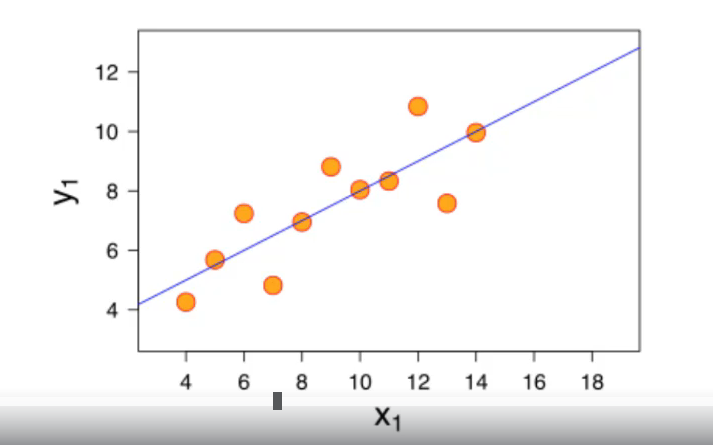

In [9]:
from IPython import display
display.Image(r"C:\Users\admin\Desktop\Data Science\Course-2021\08-Linear-Regression-Models\1.png")

* Common mountain analogy
    * When you get down to a mountain
    * Instead, you can only feel the slope of the mountain on your feet
    * How could you actually get to flat land?
    * We could do is based off your starting point, determine the slope that your feet are at
    * And obviously this is an analogy for the derivative since the slope is essentially the derivative or the gradient in the case of multiple dimensions
    * You will move to this direction if it's negative
    * And then you'll move proportional to negative gradients and then what you can do is at your next step, go ahead and repeat the process, calculate the slope your feet at and keep moving, in that same direction
    * Then eventually you can repeat these steps until you realize that your feet are completely flat
    * That is to say, the gradient or derivative is equal to zero
* This is exactly what gradient descent does!
* It even looks similar for the case of a single coefficient search

* 1 dimensional cost function (single Beta)
* Choose a starting point
* Calculate gradient at that point
* Step forward proportional to **negative** gradient
* Repeat the steps
* Note how we are essentially mapping the gradient!
* Eventually we find the Beta that minimizes the cost function! (derivative=0)
* Steps are proportional to negative gradient!
* Steeper gradient at start gives larger steps
* Smaller gradient at end gives smaller steps

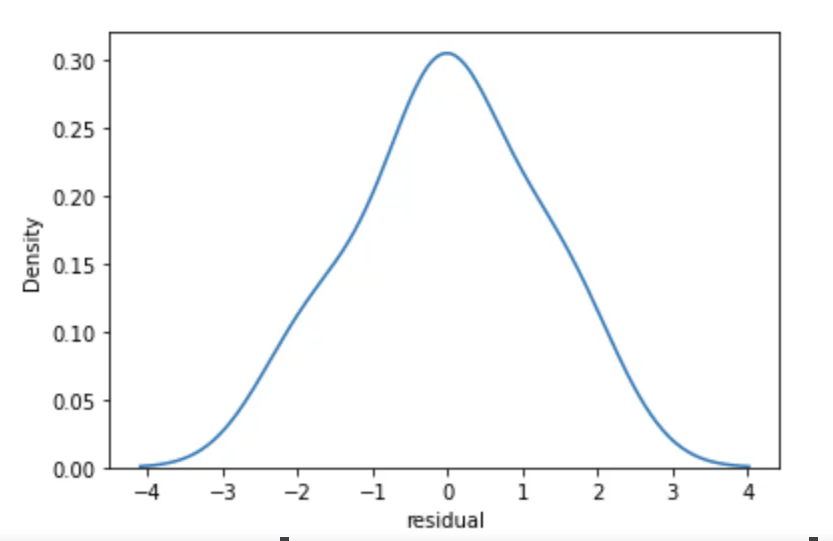

In [10]:
from IPython import display
display.Image(r"C:\Users\admin\Desktop\Data Science\Course-2021\08-Linear-Regression-Models\2.png")

* To further understand this, let's visualize this gradient descent search for two Beta values
* Process is still the same:
    * Calculate gradient at point
    * Move in a step size proportional to negative gradient
    * Repeat until minimum is found

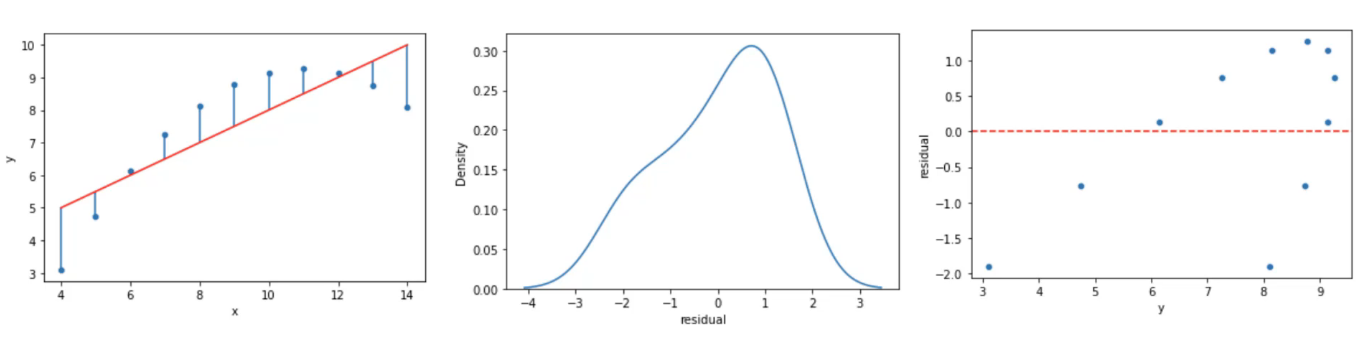

In [13]:
from IPython import display
display.Image(r"C:\Users\admin\Desktop\Data Science\Course-2021\08-Linear-Regression-Models\4.png")

* They will just map out the **contours** of the gradients cost function and visualize it on top of those contours instead of trying to do a 3D plot
* Finally! We can now leverage all our computational power to find optimal Beta coefficients that minimize the cost function producing the line of best fit!

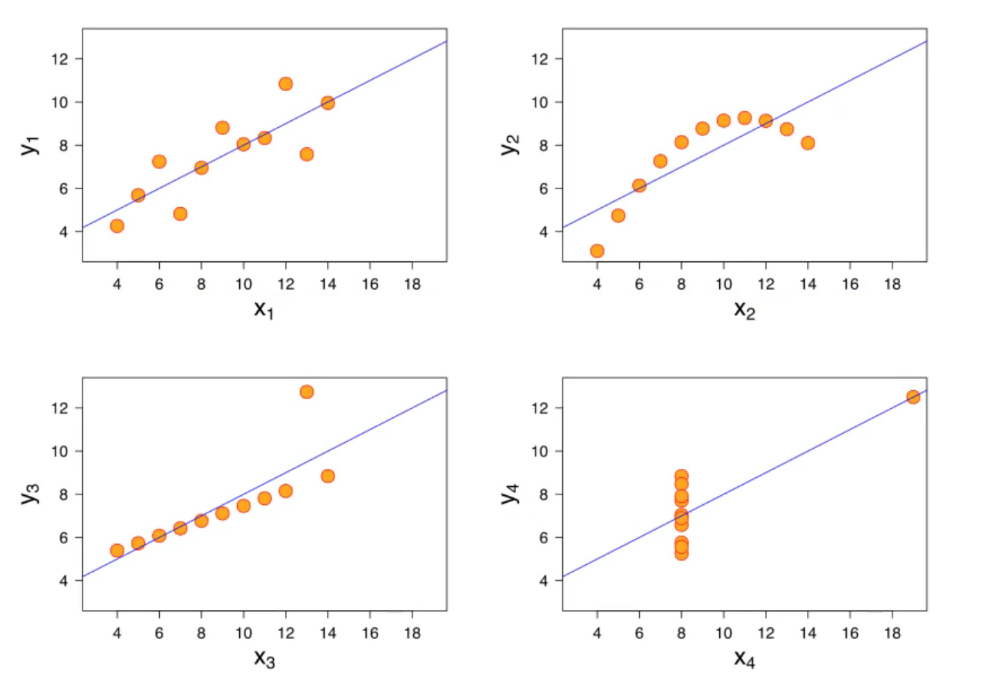

In [12]:
from IPython import display
display.Image(r"C:\Users\admin\Desktop\Data Science\Course-2021\08-Linear-Regression-Models\3.png")